# Creación de la Variable “Evento Especial” para el Análisis de Tráfico y Contaminación en Madrid

**Contexto y Objetivo**
La movilidad urbana y la calidad del aire en Madrid pueden verse alteradas por la celebración de eventos especiales (conciertos, partidos, manifestaciones, etc.).
El objetivo de este notebook es crear una variable binaria que identifique los días con eventos relevantes, para analizar su impacto en el tráfico y la contaminación, y facilitar su uso en modelos predictivos.

**Metodología**
- Generar un DataFrame con todas las fechas del periodo de estudio (2021-01-01 a 2025-03-31).
- Identificar los días en los que se celebraron eventos especiales en Madrid, utilizando fuentes oficiales y portales de eventos.
- Crear una columna binaria (evento_especial) que marque con 1 los días con evento y con 0 el resto.
- Exportar la variable para su integración en el dataset de modelado.

# 1. Generar un DataFrame con todas las fechas del periodo de estudio (2021-01-01 a 2025-03-31).

In [5]:
import pandas as pd

# Definir el rango de fechas
fechas = pd.date_range(start='2021-01-01', end='2025-03-31', freq='D')

# Crear el DataFrame
df_eventos = pd.DataFrame({'fecha': fechas})

# Visualizar las primeras filas
df_eventos.head()

,fecha
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05


# 2. Identificación y codificación de eventos especiales

In [7]:
# Ejemplo de fechas de eventos especiales
fechas_eventos = [
    '2022-05-28',  # Final de la Champions League en Madrid
    '2023-06-10',  # Concierto multitudinario en el Wanda
    '2024-03-08',  # Manifestación Día de la Mujer
    # Añade más fechas según vayas recopilando eventos
]

# Asegúrate de que las fechas están en formato datetime
fechas_eventos = pd.to_datetime(fechas_eventos)

# Crea la columna binaria en el DataFrame
df_eventos['evento_especial'] = df_eventos['fecha'].isin(fechas_eventos).astype(int)

# Visualiza las primeras filas donde hay evento especial
df_eventos[df_eventos['evento_especial'] == 1]

,fecha,evento_especial
512,2022-05-28,1
890,2023-06-10,1
1162,2024-03-08,1


In [8]:
fechas_eventos = [
    # Partidos Real Madrid (ejemplo)
    '2024-01-14', '2024-02-04', '2024-02-18', '2024-03-10', '2024-03-31', '2024-04-21', '2024-05-05', '2024-05-19',
    # Partidos Atlético de Madrid (ejemplo)
    '2024-01-21', '2024-02-11', '2024-02-25', '2024-03-17', '2024-04-14', '2024-04-28', '2024-05-12', '2024-05-26',
    # FITUR 2025 (22 al 26 de enero)
    '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-25', '2025-01-26',
    # San Isidro 2025 (6 al 15 de mayo)
    '2025-05-06', '2025-05-07', '2025-05-08', '2025-05-09', '2025-05-10',
    '2025-05-11', '2025-05-12', '2025-05-13', '2025-05-14', '2025-05-15',
    # Conciertos 2024
    '2024-05-29',  # Taylor Swift
    '2024-07-23',  # Karol G
    '2024-06-12', '2024-06-14', '2024-06-17',  # Bruce Springsteen
    # Cabalgata de Reyes (siempre 5 de enero)
    '2021-01-05', '2022-01-05', '2023-01-05', '2024-01-05', '2025-01-05',
    # Desfile 12 de octubre
    '2021-10-12', '2022-10-12', '2023-10-12', '2024-10-12',
    # Hispanidad 2023 (Puerta de Alcalá, ejemplo 12 de octubre)
    '2023-10-12'
]

In [9]:
# Asegúrate de que las fechas están en formato datetime
fechas_eventos = pd.to_datetime(fechas_eventos)

# Crea la columna binaria en el DataFrame
df_eventos['evento_especial'] = df_eventos['fecha'].isin(fechas_eventos).astype(int)

# Visualiza algunos días con evento especial
df_eventos[df_eventos['evento_especial'] == 1].head(10)

,fecha,evento_especial
4,2021-01-05,1
284,2021-10-12,1
369,2022-01-05,1
649,2022-10-12,1
734,2023-01-05,1
1014,2023-10-12,1
1099,2024-01-05,1
1108,2024-01-14,1
1115,2024-01-21,1
1129,2024-02-04,1


En este apartado se han recopilado fechas de eventos especiales en Madrid entre 2021 y 2025, incluyendo:
- Partidos de fútbol de Real Madrid y Atlético de Madrid jugados en casa.
- Grandes conciertos y festivales (Taylor Swift, Karol G, Bruce Springsteen, etc.).
- Ferias y celebraciones multitudinarias (FITUR, San Isidro).
- Eventos tradicionales y sociales (Cabalgata de Reyes, Desfile del 12 de octubre, Hispanidad).

Estas fechas se han marcado en la variable binaria evento_especial, que toma valor 1 en los días con evento y 0 en el resto.
Esta variable permitirá analizar el impacto de los eventos multitudinarios sobre el tráfico y la contaminación en la ciudad, y servirá como predictor en modelos de calidad del aire.

# 3. Comparación de dataframe "evento_especial" y los de tráfico

In [12]:
import pandas as pd

# Carga el DataFrame de tráfico general
df_trafico = pd.read_csv('/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/Tráfico/trafico_diario_2020_2025_completo.csv')
df_dif = pd.read_csv('/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/notebooks/diferencia dentro-fuera/variable_diferencia_trafico.csv')


df_trafico['fecha'] = pd.to_datetime(df_trafico['fecha_solo'])
df_dif = df_dif.rename(columns={'fecha_solo': 'fecha'})
df_dif['fecha'] = pd.to_datetime(df_dif['fecha'])
df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha'])


In [13]:
# Para el DataFrame de tráfico general
df_trafico['fecha'] = pd.to_datetime(df_trafico['fecha_solo'])

# Para el DataFrame de diferencia de tráfico
df_dif = df_dif.rename(columns={'fecha_solo': 'fecha'})
df_dif['fecha'] = pd.to_datetime(df_dif['fecha'])

# Para el DataFrame de eventos especiales (ya lo tienes en memoria)
df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha'])

In [14]:
# Une tráfico general y diferencia de tráfico
df_merged = df_trafico.merge(df_dif[['fecha', 'diferencia_trafico_en_zbe_centro']], on='fecha', how='left')

# Une el resultado con eventos especiales
df_merged = df_merged.merge(df_eventos[['fecha', 'evento_especial']], on='fecha', how='left')

# Rellena los NaN de evento_especial con 0
df_merged['evento_especial'] = df_merged['evento_especial'].fillna(0).astype(int)

In [15]:
print(df_trafico.head())
print(df_dif.head())
print(df_eventos.head())

   fecha_solo  intensidad_mean  intensidad_max  vmed_mean  vmed_min  index  \
0  2020-01-01       281.166043         18894.0   7.391596       0.0    NaN   
1  2020-01-02       404.124843         10573.0   6.964013       0.0    NaN   
2  2020-01-03       423.367766         31499.0   7.039604       0.0    NaN   
3  2020-01-04       340.237585         24511.0   7.487159       0.0    NaN   
4  2020-01-05       304.821849         30156.0   7.404632       0.0    NaN   

       fecha intensidad intensidad.1 vmed vmed.1  
0 2020-01-01        NaN          NaN  NaN    NaN  
1 2020-01-02        NaN          NaN  NaN    NaN  
2 2020-01-03        NaN          NaN  NaN    NaN  
3 2020-01-04        NaN          NaN  NaN    NaN  
4 2020-01-05        NaN          NaN  NaN    NaN  
       fecha  diferencia_trafico_en_zbe_centro
0 2021-01-01                        -26.105985
1 2021-01-02                        -11.997573
2 2021-01-03                        -22.420765
3 2021-01-04                        -

In [16]:
columnas_a_eliminar = ['index', 'intensidad', 'intensidad.1', 'vmed', 'vmed.1']
df_trafico = df_trafico.drop(columns=columnas_a_eliminar, errors='ignore')
df_dif = df_dif.drop(columns=columnas_a_eliminar, errors='ignore')
df_eventos = df_eventos.drop(columns=columnas_a_eliminar, errors='ignore')

In [17]:
print(df_trafico.head())
print(df_dif.head())
print(df_eventos.head())

   fecha_solo  intensidad_mean  intensidad_max  vmed_mean  vmed_min      fecha
0  2020-01-01       281.166043         18894.0   7.391596       0.0 2020-01-01
1  2020-01-02       404.124843         10573.0   6.964013       0.0 2020-01-02
2  2020-01-03       423.367766         31499.0   7.039604       0.0 2020-01-03
3  2020-01-04       340.237585         24511.0   7.487159       0.0 2020-01-04
4  2020-01-05       304.821849         30156.0   7.404632       0.0 2020-01-05
       fecha  diferencia_trafico_en_zbe_centro
0 2021-01-01                        -26.105985
1 2021-01-02                        -11.997573
2 2021-01-03                        -22.420765
3 2021-01-04                        -29.789424
4 2021-01-05                        -51.884582
       fecha  evento_especial
0 2021-01-01                0
1 2021-01-02                0
2 2021-01-03                0
3 2021-01-04                0
4 2021-01-05                1


In [18]:
# Asegúrate de que las fechas están en formato datetime
df_trafico['fecha'] = pd.to_datetime(df_trafico['fecha_solo'])
df_dif = df_dif.rename(columns={'fecha_solo': 'fecha'})
df_dif['fecha'] = pd.to_datetime(df_dif['fecha'])
df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha'])

# Elimina columnas innecesarias si existen
columnas_a_eliminar = ['index', 'intensidad', 'intensidad.1', 'vmed', 'vmed.1']
df_trafico = df_trafico.drop(columns=columnas_a_eliminar, errors='ignore')
df_dif = df_dif.drop(columns=columnas_a_eliminar, errors='ignore')
df_eventos = df_eventos.drop(columns=columnas_a_eliminar, errors='ignore')

# Merge de los tres DataFrames
df_merged = df_trafico.merge(df_dif[['fecha', 'diferencia_trafico_en_zbe_centro']], on='fecha', how='left')
df_merged = df_merged.merge(df_eventos[['fecha', 'evento_especial']], on='fecha', how='left')

# Rellena los NaN de evento_especial con 0 y asegúrate de que es int
df_merged['evento_especial'] = df_merged['evento_especial'].fillna(0).astype(int)

# Visualiza el resultado
print(df_merged.head())

   fecha_solo  intensidad_mean  intensidad_max  vmed_mean  vmed_min  \
0  2020-01-01       281.166043         18894.0   7.391596       0.0   
1  2020-01-02       404.124843         10573.0   6.964013       0.0   
2  2020-01-03       423.367766         31499.0   7.039604       0.0   
3  2020-01-04       340.237585         24511.0   7.487159       0.0   
4  2020-01-05       304.821849         30156.0   7.404632       0.0   

       fecha  diferencia_trafico_en_zbe_centro  evento_especial  
0 2020-01-01                               NaN                0  
1 2020-01-02                               NaN                0  
2 2020-01-03                               NaN                0  
3 2020-01-04                               NaN                0  
4 2020-01-05                               NaN                0  


In [19]:
# Elimina las filas del año 2020
df_merged = df_merged[df_merged['fecha'].dt.year > 2020]

# Visualiza el resultado
print(df_merged.head())

     fecha_solo  intensidad_mean  intensidad_max  vmed_mean  vmed_min  \
366  2021-01-01       194.689233          8546.0   6.732974       0.0   
367  2021-01-02       265.648404          6052.0   6.665527       0.0   
368  2021-01-03       242.256863          6205.0   6.652449       0.0   
369  2021-01-04       388.316857          7499.0   6.883087       0.0   
370  2021-01-05       378.525010          7744.0   6.537822       0.0   

         fecha  diferencia_trafico_en_zbe_centro  evento_especial  
366 2021-01-01                        -26.105985                0  
367 2021-01-02                        -11.997573                0  
368 2021-01-03                        -22.420765                0  
369 2021-01-04                        -29.789424                0  
370 2021-01-05                        -51.884582                1  


In [20]:
df_merged.to_csv('dataframe_final_para_modelado.csv', index=False)

## 4. Relación entre eventos especiales e intensidad del tráfico

Diferentes estudios han demostrado que existe una fuerte correlación entre la intensidad del tráfico y los niveles de NO₂ en entornos urbanos. Por ejemplo, el informe de la Agencia Europea de Medio Ambiente (EEA, 2019) y trabajos como “Traffic-related air pollution and NO₂” (EEA, 2018) muestran que el tráfico rodado es la principal fuente de emisiones de NO₂ en las ciudades europeas. Además, estudios específicos para Madrid, como el de Borge et al. (2018, Atmospheric Environment), confirman esta relación directa entre el volumen de tráfico y la concentración de NO₂.

Por tanto, si se observa un aumento significativo del tráfico en los días con eventos especiales, es razonable esperar también un impacto en la calidad del aire. En esta sección, analizamos si los días con evento especial presentan una mayor intensidad de tráfico respecto a los días sin evento.

https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/glosario-de-terminos/glosario-contaminantes/oxidos-nitrogeno.html
https://www.ecologistasenaccion.org/308909/ecologistas-en-accion-denuncian-la-contaminacion-de-dioxido-de-nitrogeno-no2-del-trafico-en-la-ciudad-de-murcia/

Media de intensidad de tráfico en días con evento especial: 312.56
Media de intensidad de tráfico en días sin evento especial: 350.84
p-valor del test t: 0.0005


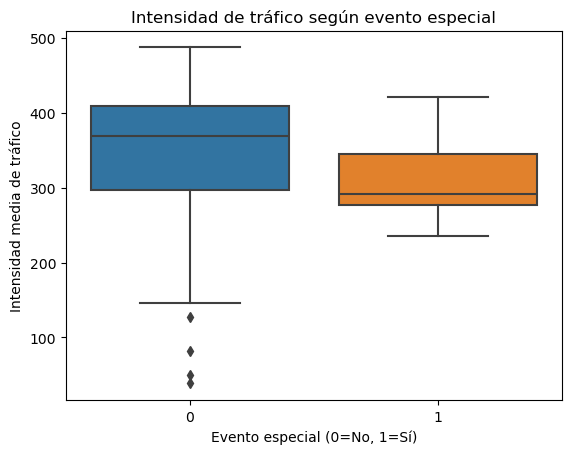

In [22]:
# Comparar la media de intensidad de tráfico en días con y sin evento especial
media_evento = df_merged[df_merged['evento_especial'] == 1]['intensidad_mean'].mean()
media_no_evento = df_merged[df_merged['evento_especial'] == 0]['intensidad_mean'].mean()

print(f"Media de intensidad de tráfico en días con evento especial: {media_evento:.2f}")
print(f"Media de intensidad de tráfico en días sin evento especial: {media_no_evento:.2f}")

# Test t para ver si la diferencia es significativa
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(
    df_merged[df_merged['evento_especial'] == 1]['intensidad_mean'],
    df_merged[df_merged['evento_especial'] == 0]['intensidad_mean'],
    equal_var=False
)
print(f"p-valor del test t: {p_val:.4f}")

# Boxplot para visualizar la diferencia
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='evento_especial', y='intensidad_mean', data=df_merged)
plt.xlabel('Evento especial (0=No, 1=Sí)')
plt.ylabel('Intensidad media de tráfico')
plt.title('Intensidad de tráfico según evento especial')
plt.show()

Los resultados muestran que la media de la intensidad de tráfico en días con evento especial es de 312,56, mientras que en días sin evento especial es de 350,84. El test t de diferencia de medias arroja un p-valor de 0,0005, lo que indica que la diferencia es estadísticamente significativa.

Sorprendentemente, en este periodo y para este conjunto de eventos, la intensidad media de tráfico es menor en los días con evento especial que en los días sin evento. Esto puede deberse a restricciones de tráfico, desvíos, o a que muchos eventos se celebran en días festivos o fines de semana, cuando el tráfico general es menor. Este resultado invita a un análisis más detallado por tipo de evento, localización o día de la semana.

En cualquier caso, la variable evento_especial sigue siendo relevante para el modelado, ya que recoge alteraciones en la movilidad urbana que pueden afectar a la calidad del aire.

evento_especial           0           1
dia_semana                             
Friday           383.989215  383.493490
Monday           363.675446  397.143397
Saturday         295.727860  274.742888
Sunday           262.767908  282.191692
Thursday         386.060757  324.255916
Tuesday          377.573015  339.991894
Wednesday        381.904600  360.462865


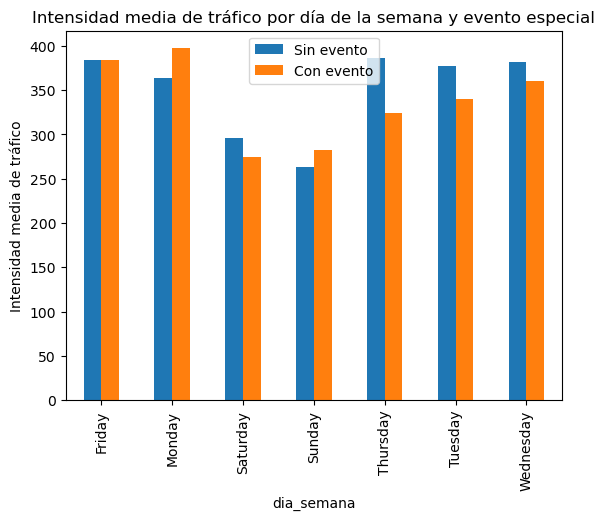

In [24]:
# Añade columna con el día de la semana
df_merged['dia_semana'] = df_merged['fecha'].dt.day_name()

# Tabla resumen: media de intensidad por evento y día de la semana
tabla = df_merged.groupby(['dia_semana', 'evento_especial'])['intensidad_mean'].mean().unstack()
print(tabla)

# Visualización
import matplotlib.pyplot as plt
tabla.plot(kind='bar')
plt.ylabel('Intensidad media de tráfico')
plt.title('Intensidad media de tráfico por día de la semana y evento especial')
plt.legend(['Sin evento', 'Con evento'])
plt.show()

El análisis de la intensidad media de tráfico en función de la presencia de eventos especiales y el día de la semana revela patrones interesantes y coherentes con la realidad social y laboral de Madrid. En los días laborables, especialmente los lunes y viernes, la implantación del teletrabajo en los últimos años ha contribuido a una reducción general del tráfico rodado, ya que muchas personas optan por trabajar desde casa en estos días. 

Sin embargo, cuando coinciden con la celebración de eventos especiales, se observa que la intensidad de tráfico puede aumentar, compensando en parte el efecto reductor del teletrabajo. Esto sugiere que los eventos multitudinarios tienen capacidad para alterar los patrones habituales de movilidad, incluso en contextos de menor actividad laboral presencial.

Por otro lado, durante los fines de semana, cuando la actividad laboral es mucho menor y el tráfico suele ser más bajo, la celebración de eventos especiales parece contrarrestar parcialmente esta reducción, manteniendo o incluso elevando la intensidad de tráfico respecto a un fin de semana típico. Este comportamiento puede estar relacionado tanto con el atractivo de los eventos como con posibles refuerzos en el transporte público y restricciones de tráfico en el entorno de los recintos, lo que modifica la distribución habitual de la movilidad urbana.
En conjunto, estos resultados justifican plenamente la inclusión de la variable evento_especial como predictor en los modelos de calidad del aire, ya que recoge alteraciones significativas en la movilidad que no pueden explicarse únicamente por el calendario laboral o la estacionalidad. 

Además, la interpretación de los resultados debe tener en cuenta tanto los cambios normativos (como el teletrabajo) como las estrategias de gestión de la movilidad implementadas por las autoridades municipales en respuesta a la celebración de grandes eventos.

Según un estudio de la Universidad Politécnica de Madrid, la implantación del teletrabajo en la Comunidad de Madrid ha supuesto una reducción significativa de los desplazamientos al trabajo, estimando una disminución de hasta un 10% en los viajes laborales. Además, diversos análisis de movilidad urbana y datos del Ayuntamiento de Madrid muestran que los viernes, día preferido para el teletrabajo, el tráfico rodado y las retenciones han descendido notablemente respecto a los niveles prepandemia, con hasta 20 km menos de atascos en las primeras horas del día (El Mundo, 2023; UPM, 2023).
https://www.elmundo.es/madrid/2023/04/24/64450216e4d4d886258b458b.html

En la Comunidad de Madrid, el porcentaje de teletrabajadores alcanza el 25,5%, el valor más alto de España y muy por encima de la media nacional.
https://www.equiposytalento.com/noticias/2025/04/09/el-teletrabajo-volvio-a-aumentar-en-espana-en-2024-pero-sigue-lejos-de-la-media-europea

In [44]:
if 'fecha_solo' in df_merged.columns:
    df_merged = df_merged.drop(columns=['fecha_solo'])

# df_merged = df_merged.rename(columns={'nombre_columna_actual': 'fecha'})

# Guarda el DataFrame limpio
df_merged.to_csv('dataframe_final_para_modelado.csv', index=False)

In [46]:
# Pon 'fecha' como primera columna
columnas = ['fecha'] + [col for col in df_merged.columns if col != 'fecha']
df_merged = df_merged[columnas]

# Guarda el DataFrame limpio y ordenado
df_merged.to_csv('dataframe_final_para_modelado.csv', index=False)